# Explore here

It's recommended to use this notebook for exploration purposes.

In [3]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup as bs
import sqlite3 as sql3


url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
#header for all browsers
headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}

html_data = requests.get(url, time.sleep(10), headers=headers).text
soup = bs(html_data, "html.parser")
tablas = soup.find_all('table')
t_revenue = tablas[1]
t_body = t_revenue.find('tbody')

date = []
sales = []

for row in t_body.find_all('tr'):
    datas_row = []  # Lista para almacenar los datos de esta fila
    for cell in row.find_all('td'):
        data = cell.get_text()
        datas_row.append(data)
    # Agrega los datos de la fila a las listas existentes
    if len(datas_row) >= 2:  # Verifica que haya al menos dos elementos en la fila
        date.append(datas_row[0])
        sales.append(datas_row[1])

sales = [data.replace(',', '').replace('$', '') for data in sales]

tesla_quarterly = pd.DataFrame({'Quarter date': date, 'Incomes': sales})
tesla_quarterly.head()

tesla_quarterly = pd.DataFrame({'Quarter date': date, 'Incomes': sales})


conn = sql3.connect('Tesla_sales.db')
#Conecta a la base de datos SQLite o la crea si no existe

# tesla_quarterly.to_sql('quarterly_income', conn, if_exists='replace', index=False)
# #Convierte mi pd.dataframe en tabla SQL

cursor = conn.cursor()
# cursor.execute("""CREATE TABLE income (date, sales)""")

tsl_tu = list(tesla_quarterly.to_records(index = False))
cursor.executemany("INSERT INTO income VALUES (?,?)", tsl_tu)
conn.commit()

for fila in cursor.execute("SELECT * FROM income"):
    print(fila)


('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-

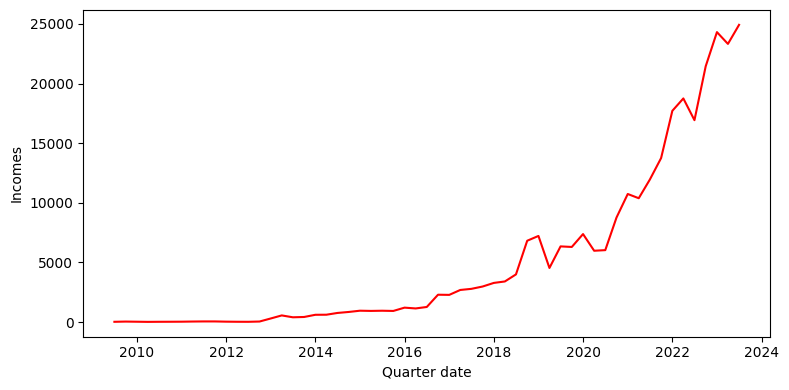

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, axis = plt.subplots(figsize = (8, 4))

tesla_quarterly = tesla_quarterly[tesla_quarterly['Incomes'] != '']
tesla_quarterly['Incomes'] = tesla_quarterly['Incomes'].astype(int)
tesla_quarterly["Quarter date"] = pd.to_datetime(tesla_quarterly["Quarter date"])
sns.lineplot(data = tesla_quarterly, x = "Quarter date", y = "Incomes", color='red')

plt.tight_layout()

plt.show()

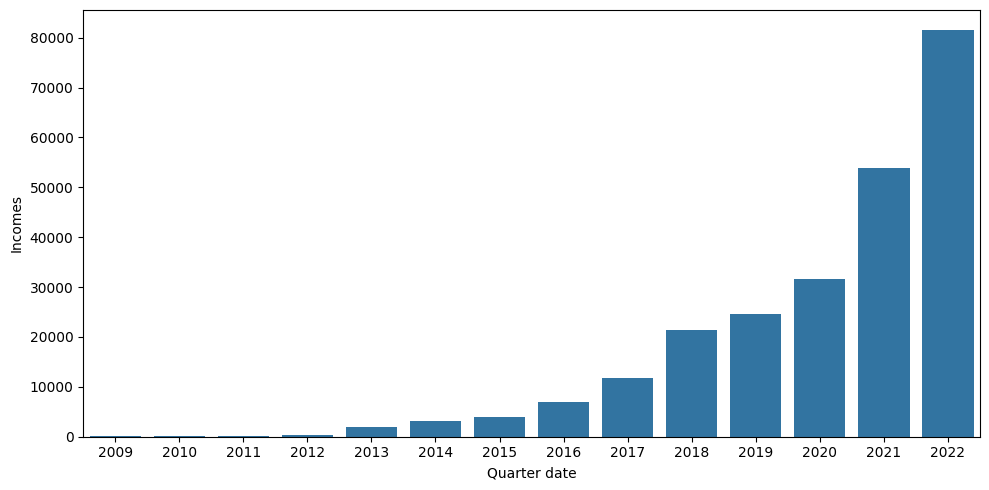

In [10]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_quarterly["Quarter date"] = pd.to_datetime(tesla_quarterly["Quarter date"])
tesla_quarter_year = tesla_quarterly.groupby(tesla_quarterly["Quarter date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_quarter_year[tesla_quarter_year["Quarter date"] < 2023], x = "Quarter date", y = "Incomes")

plt.tight_layout()

plt.show()

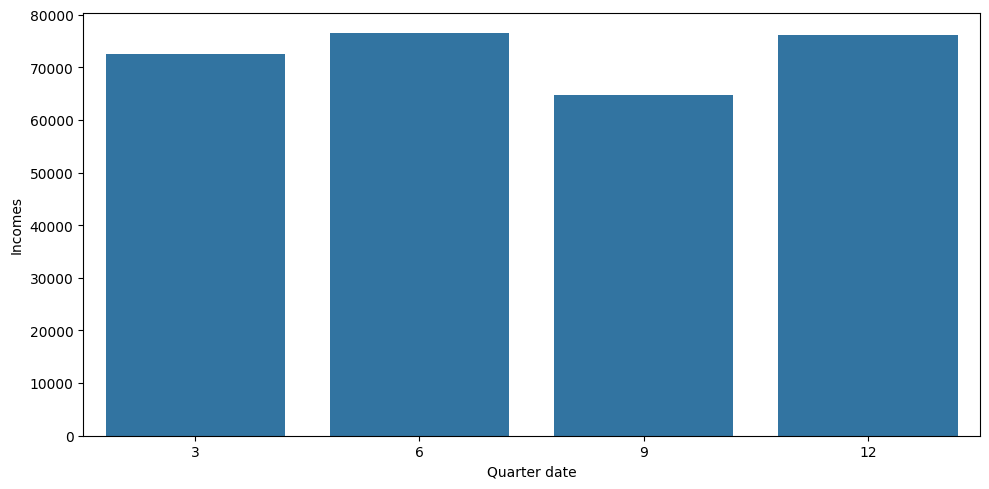

In [12]:
fig, axis = plt.subplots(figsize = (10, 5))

tesla_monthly = tesla_quarterly.groupby(tesla_quarterly["Quarter date"].dt.month).sum().reset_index()

sns.barplot(data = tesla_monthly, x = "Quarter date", y = "Incomes")

plt.tight_layout()

plt.show()